# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import datetime
import json

from scipy import stats

formatted_todays_date = datetime.datetime.now().strftime("%Y-%m-%d")


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 622


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"  

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?units=metric&q={city}&appid={weather_api_key}"  
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Get weather data
        api_response = requests.get(city_url)

        # Parse the JSON and retrieve data
        city_weather = api_response.json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        city_date =  city_weather["dt"]
        # dt_object = datetime.datetime.utcfromtimestamp(city_weather["dt"])
        # city_date = dt_object.strftime('%Y-%m-%d %H:%M:%S')

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hawaiian paradise park
Processing Record 2 of Set 1 | wailua homesteads
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | olonkinbyen
Processing Record 5 of Set 1 | waitangi
Processing Record 6 of Set 1 | lasem
Processing Record 7 of Set 1 | alaghsas
Processing Record 8 of Set 1 | papatowai
Processing Record 9 of Set 1 | esens
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | grytviken
Processing Record 12 of Set 1 | constantia
Processing Record 13 of Set 1 | blackmans bay
Processing Record 14 of Set 1 | bikaner
Processing Record 15 of Set 1 | mogocha
Processing Record 16 of Set 1 | petropavlovsk-kamchatsky
Processing Record 17 of Set 1 | pandan
Processing Record 18 of Set 1 | ventspils
Processing Record 19 of Set 1 | invercargill
Processing Record 20 of Set 1 | isafjordur
Processing Record 21 of Set 1 | port-aux-francais
Processing Record 22 

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          592
Lat           592
Lng           592
Max Temp      592
Humidity      592
Cloudiness    592
Wind Speed    592
Country       592
Date          592
dtype: int64

In [5]:
# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hawaiian paradise park,19.5933,-154.9731,23.35,90,100,0.45,US,1715315896
1,wailua homesteads,22.0669,-159.3780,26.24,83,20,4.12,US,1715315896
2,puerto ayora,-0.7393,-90.3518,23.08,97,66,2.41,EC,1715315896
3,olonkinbyen,70.9221,-8.7187,-2.33,77,50,7.51,SJ,1715315897
4,waitangi,-43.9535,-176.5597,9.34,90,87,1.34,NZ,1715315897


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")


In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,23.35,90,100,0.45,US,1715315896
1,wailua homesteads,22.0669,-159.3780,26.24,83,20,4.12,US,1715315896
2,puerto ayora,-0.7393,-90.3518,23.08,97,66,2.41,EC,1715315896
3,olonkinbyen,70.9221,-8.7187,-2.33,77,50,7.51,SJ,1715315897
4,waitangi,-43.9535,-176.5597,9.34,90,87,1.34,NZ,1715315897


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

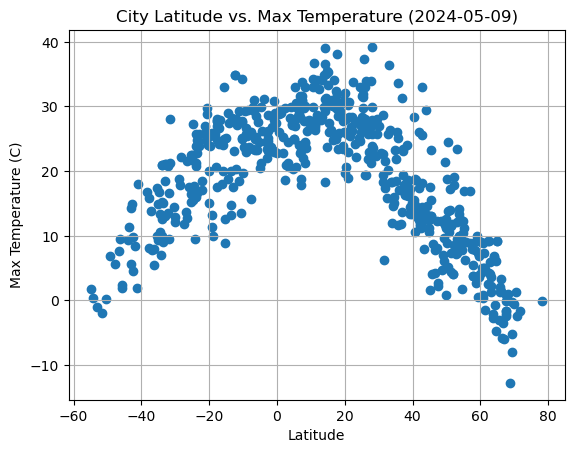

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({formatted_todays_date})")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

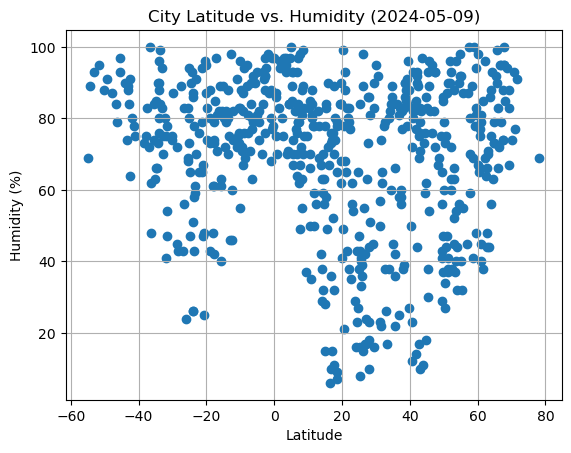

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({formatted_todays_date})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

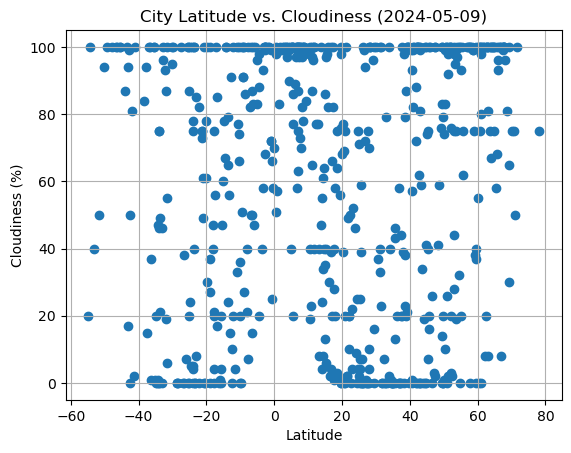

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({formatted_todays_date})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()


#### Latitude vs. Wind Speed Plot

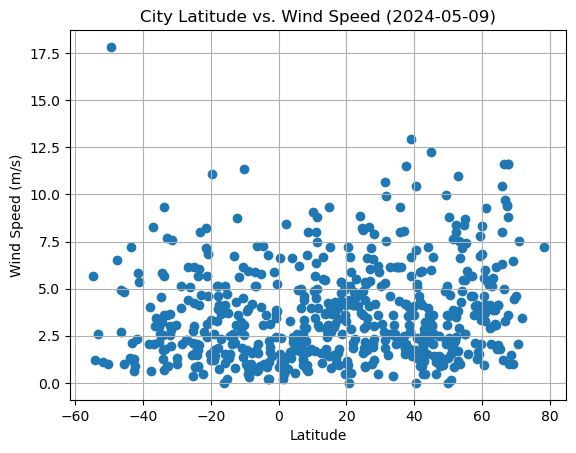

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({formatted_todays_date})")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate):
#def create_linear_regression_plot(x_values, y_values, x_label, y_label):
    
    # Perform a linear regression on temperature vs. latitude
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
 
    # Get regression values
    regress_values = x_values * slope + intercept
 
    # Create line equation string
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create Plot
    plt.scatter(x_values, y_values, marker="o")
    plt.plot(x_values, regress_values, "r-")
    
    # label the plot , annotate the line equation
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.annotate(line_eq, xy=(x_annotate, y_annotate), xycoords='axes fraction', fontsize=15, color="red")
    
    # Print r value
    print(f"The r-value is: {rvalue**2}")
    
    # Show plot
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[ city_data_df["Lat"] >= 0 ].copy()

# Display sample data
northern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,hawaiian paradise park,19.5933,-154.9731,23.35,90,100,0.45,US,1715315896
1,wailua homesteads,22.0669,-159.3780,26.24,83,20,4.12,US,1715315896
3,olonkinbyen,70.9221,-8.7187,-2.33,77,50,7.51,SJ,1715315897
6,alaghsas,17.0187,8.0168,29.92,15,66,1.26,NE,1715315898
8,esens,53.6487,7.6127,9.99,96,75,1.03,DE,1715315899


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[ city_data_df["Lat"] < 0 ].copy()

# Display sample data
southern_hemi_df.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,puerto ayora,-0.7393,-90.3518,23.08,97,66,2.41,EC,1715315896
4,waitangi,-43.9535,-176.5597,9.34,90,87,1.34,NZ,1715315897
5,lasem,-6.6922,111.4527,31.05,63,50,5.13,ID,1715315897
7,papatowai,-46.5619,169.4708,7.62,84,100,4.93,NZ,1715315898
9,puerto natales,-51.7236,-72.4875,-1.94,95,50,1.11,CL,1715315899


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7354586648012256


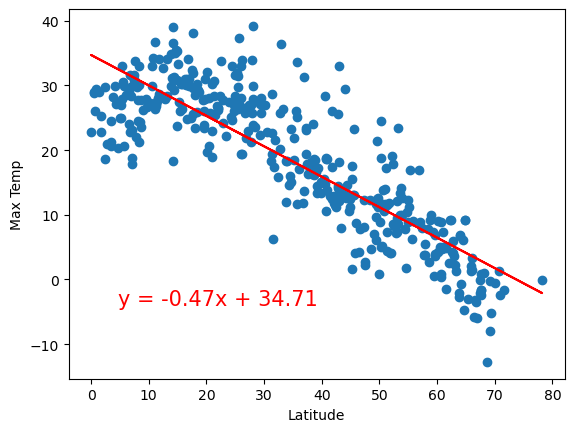

In [15]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
x_annotate = .1
y_annotate = .2

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


The r-value is: 0.5907079520723397


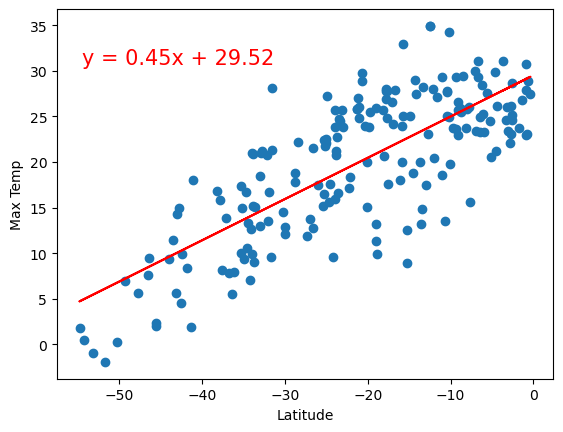

In [16]:
# Linear regression on Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
x_label = "Latitude"
y_label = "Max Temp"
x_annotate = .05
y_annotate = .85

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


**Discussion about the linear relationship:** 

In both the Northern and Souther hemispheres, it can be clearly seen that the closer one travels towards the equator,
the higher the maximum temperature will be.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.0022133834095937367


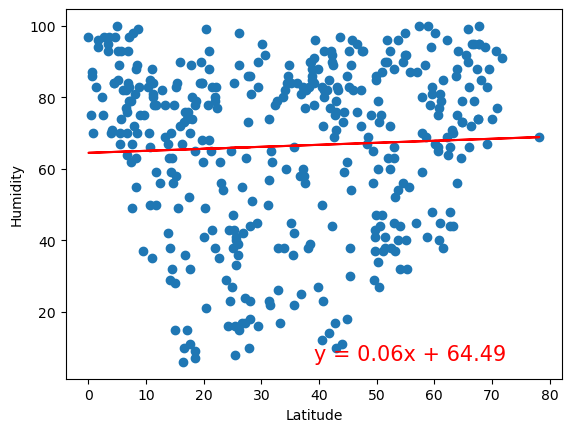

In [17]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
x_annotate = .5
y_annotate = .05

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)

The r-value is: 0.0013231203745431746


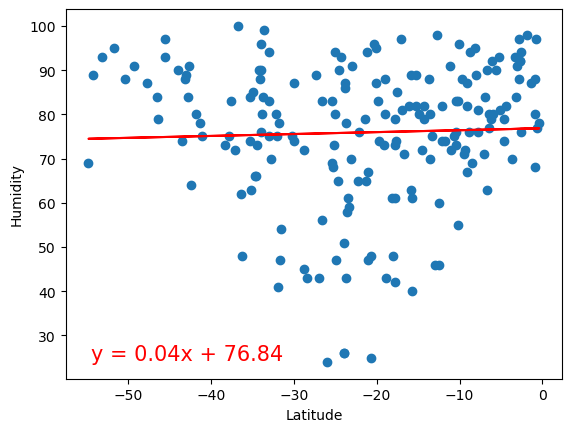

In [18]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
x_label = "Latitude"
y_label = "Humidity"
x_annotate = .05
y_annotate = .05

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


**Discussion about the linear relationship:** 
In both the Northern and Southern hemispheres, Humidity varies,  
with the lowest humidities about 20 to 30 latitude degrees from the equator.  
The Southern hemisphere averages to be more humid that the Northern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0013707226050991381


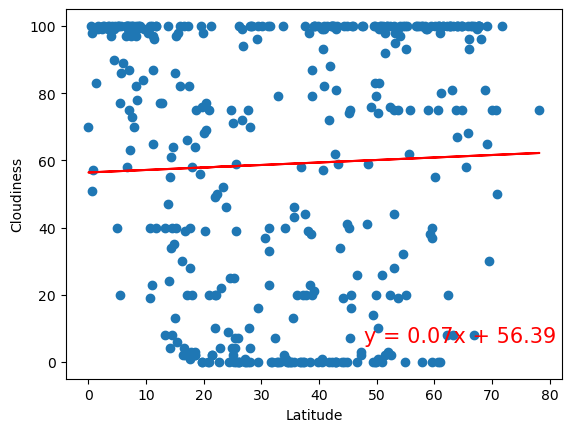

In [19]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
x_annotate = .6
y_annotate = .1

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


The r-value is: 0.00360076663186961


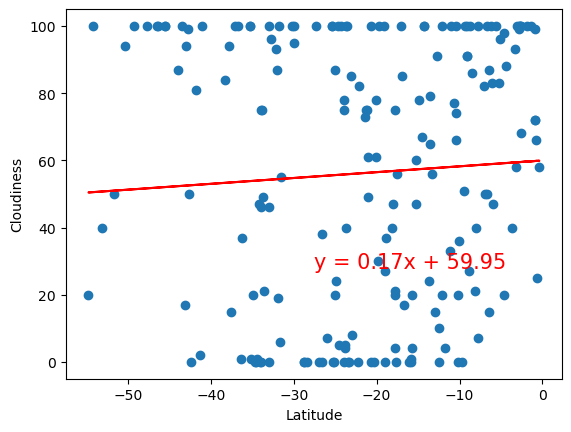

In [20]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
x_label = "Latitude"
y_label = "Cloudiness"
x_annotate = .5
y_annotate = .3

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


**Discussion about the linear relationship:** 
In both the Northern and Southern hemispheres, Cloudiness varies.  
The Northern hemisphere averages to be more cloudy than the Southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04094884447658481


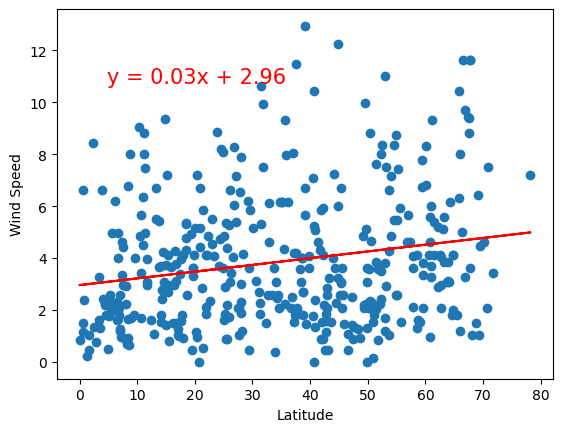

In [21]:
# Northern Hemisphere

x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
x_annotate = .1
y_annotate = .8

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


The r-value is: 0.005581023953538783


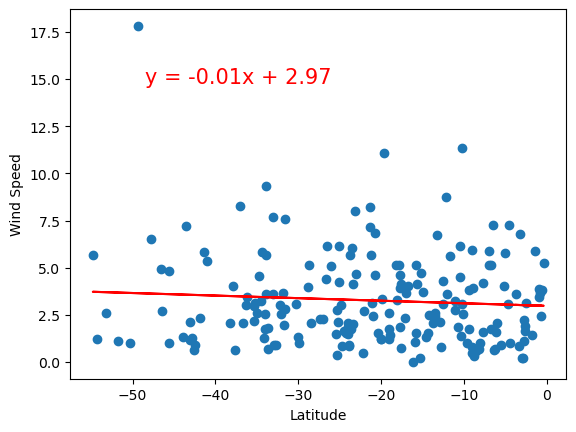

In [22]:
# Southern Hemisphere

x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
x_label = "Latitude"
y_label = "Wind Speed"
x_annotate = .15
y_annotate = .8

create_linear_regression_plot(x_values, y_values, x_label, y_label, x_annotate, y_annotate)


**Discussion about the linear relationship:** 
In both the Northern and Southern hemispheres, Wind Speed varies.  
Average Wind Speed rises slightly the further one travels away from the equator ... particularily in the Norther hemisphere.